<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

### Import libraries

This notebook was run and tested on Keras version 2.3.1 and Tensorflow 2.2.0.

In [ ]:
# Check keras and tensorflow versions

import tensorflow as tf
from tensorflow import keras

print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)

Keras version:  2.11.0
Tensorflow version:  2.11.0


In [ ]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Load data

In [ ]:
# The diabetes dataset
diabetes = load_diabetes()

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Prepare input data

In [ ]:
# input
X = diabetes.data

# print the type of X to check that it is a numpy array
print("X is a ", type(X))

# Print shape to check rows and columns
print("X has {} rows and {} columns".format(X.shape[0], X.shape[1]))

# Save number of columns as n_cols
n_cols = X.shape[1]

# output
y = diabetes.target

print("First 10 values in y: ", y[:10])

X is a  <class 'numpy.ndarray'>
X has 442 rows and 10 columns
First 10 values in y:  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [ ]:
# How many observations are in y?
len(y)

442

In [ ]:
y.shape

(442,)

### Split the data (training/test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [ ]:
# Set up the model architecture
model = Sequential()

In [ ]:
# Add the first hidden layer
model.add(Dense(15, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(5, activation = 'relu'))
# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [ ]:
output = activation(dot(input, kernel) + bias)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 5)                 80        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [ ]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [ ]:
# shuffle training data
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

In [ ]:
%%time
# Fit the model
history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 1000,
    verbose = 1)

Epoch 1/1000
24/24 [==============================] - 0s 7ms/step - loss: 2737.0979 - mse: 2737.0981 - val_loss: 2694.2903 - val_mse: 2694.2903
Epoch 2/1000
24/24 [==============================] - 0s 5ms/step - loss: 2735.9973 - mse: 2735.9973 - val_loss: 2693.7258 - val_mse: 2693.7258
Epoch 3/1000
24/24 [==============================] - 0s 5ms/step - loss: 2738.1851 - mse: 2738.1851 - val_loss: 2694.5420 - val_mse: 2694.5420
Epoch 4/1000
24/24 [==============================] - 0s 5ms/step - loss: 2738.0417 - mse: 2738.0417 - val_loss: 2695.0972 - val_mse: 2695.0972
Epoch 5/1000
24/24 [==============================] - 0s 5ms/step - loss: 2736.9194 - mse: 2736.9194 - val_loss: 2694.7598 - val_mse: 2694.7598
Epoch 6/1000
24/24 [==============================] - 0s 5ms/step - loss: 2740.8379 - mse: 2740.8376 - val_loss: 2696.4023 - val_mse: 2696.4023
Epoch 7/1000
24/24 [==============================] - 0s 7ms/step - loss: 2735.4019 - mse: 2735.4019 - val_loss: 2695.2490 - val_mse: 26

### Create predictions

In [ ]:
predictions = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [ ]:
predictions

array([[177.19484 ],
       [190.6654  ],
       [174.3206  ],
       [231.272   ],
       [195.12177 ],
       [263.9641  ],
       [153.85968 ],
       [ 65.721   ],
       [151.15323 ],
       [171.32864 ],
       [215.2659  ],
       [194.45752 ],
       [ 93.375465],
       [228.98764 ],
       [ 88.60746 ],
       [226.03033 ],
       [ 85.33921 ],
       [122.20124 ],
       [134.41983 ],
       [160.44449 ],
       [ 81.78695 ],
       [ 78.95658 ],
       [196.57785 ],
       [119.7575  ],
       [236.07538 ],
       [189.21463 ],
       [125.031456],
       [ 95.17875 ],
       [185.40793 ],
       [230.237   ],
       [224.22495 ],
       [225.0994  ],
       [166.23793 ],
       [116.28034 ],
       [128.63307 ],
       [158.39326 ],
       [106.37878 ],
       [235.85077 ],
       [211.33875 ],
       [127.41239 ],
       [ 95.51545 ],
       [122.607544],
       [184.3729  ],
       [232.55505 ],
       [138.9509  ],
       [272.0603  ],
       [151.52895 ],
       [203.5

### Evaluate the model

In [ ]:
# Calculate test MSE
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])

5/5 [==============================] - 0s 3ms/step - loss: 3308.2473 - mse: 3308.2473

Test loss: 3308.247314


In [ ]:
score

[3308.247314453125, 3308.247314453125]

In [ ]:
# Find RMSE
score[0] ** (1/2)

57.51736532955178

In [ ]:
y.mean()

152.13348416289594

In [ ]:
y.std()

77.00574586945044

In [ ]:
y.min()

25.0

In [ ]:
y.max()

346.0

### Visualisation of cost

In [ ]:
history.history

{'loss': [28742.298828125,
  28721.02734375,
  28695.73828125,
  28661.822265625,
  28615.83203125,
  28553.828125,
  28470.89453125,
  28359.302734375,
  28222.998046875,
  28050.548828125,
  27834.283203125,
  27578.728515625,
  27266.52734375,
  26893.556640625,
  26457.591796875,
  25954.177734375,
  25406.595703125,
  24795.875,
  24119.95703125,
  23375.22265625,
  22579.826171875,
  21751.62890625,
  20882.505859375,
  19964.611328125,
  19033.048828125,
  18090.982421875,
  17103.947265625,
  16115.310546875,
  15137.953125,
  14197.7958984375,
  13245.34765625,
  12330.701171875,
  11442.3759765625,
  10588.2763671875,
  9838.662109375,
  9150.091796875,
  8505.9775390625,
  7912.40185546875,
  7359.58349609375,
  6877.56884765625,
  6479.0439453125,
  6130.41845703125,
  5807.4208984375,
  5530.91943359375,
  5296.837890625,
  5110.43701171875,
  4962.04931640625,
  4853.66845703125,
  4730.62548828125,
  4632.5009765625,
  4559.28564453125,
  4489.41650390625,
  4432.8002929

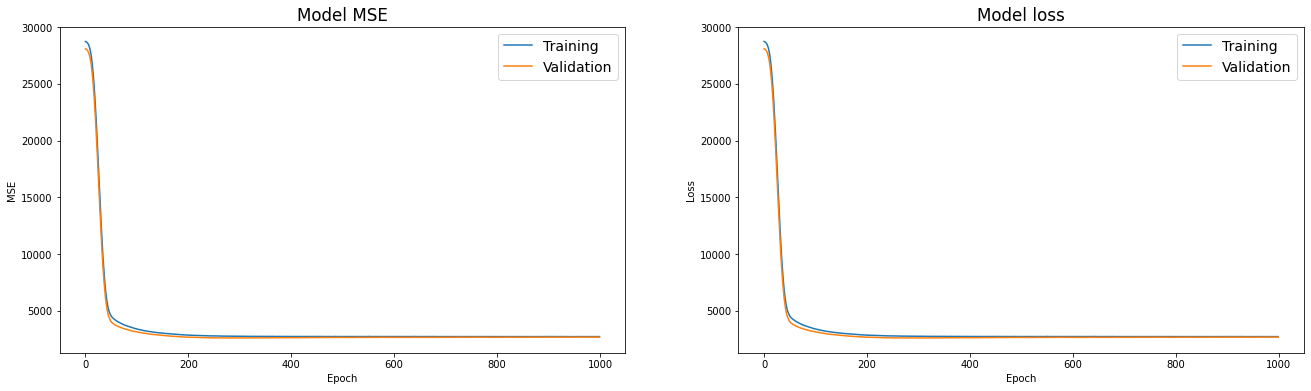

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [ ]:
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

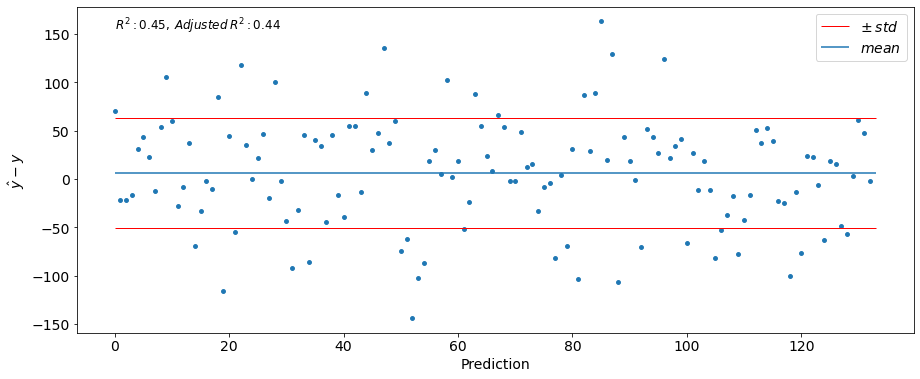

In [ ]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



